In [1]:
!ln -s /media/sun/12TB6/datasets/droid/droid_raw ./

# Meta Info

In [20]:
{
  "uuid": "AUTOLab+5d05c5aa+2023-07-07-09h-42m-23s",
  "lab": "AUTOLab",
  "user": "Zehan Ma",
  "user_id": "5d05c5aa",
  "date": "2023-07-07",
  "timestamp": "2023-07-07-09h-42m-23s",
  "hdf5_path": "success/2023-07-07/Fri_Jul__7_09:42:23_2023/trajectory.h5",
  "building": "BAIR",
  "scene_id": 5207831207,
  "success": true,
  "robot_serial": "fr3-295341-1326595",
  "r2d2_version": "1.3",
  "current_task": "Use cup to pour something granular (ex: nuts, rice, dried pasta, coffee beans)",
  "trajectory_length": 472,
  "wrist_cam_serial": "18026681",
  "ext1_cam_serial": "22008760",
  "ext2_cam_serial": "24400334",
  "wrist_cam_extrinsics": [
    0.26852859729525597,
    0.12468921693797806,
    0.38842643469874216,
    2.602529290663223,
    -0.1020245067022938,
    1.8903797737369048
  ],
  "ext1_cam_extrinsics": [
    0.4039752945788883,
    0.47318839256292644,
    0.27170584157181743,
    -1.6827143529296786,
    0.07550227077885108,
    -2.668292283962724
  ],
  "ext2_cam_extrinsics": [
    0.2596757315060087,
    -0.36626259649963777,
    0.24849304837972613,
    -1.742115402153725,
    -0.0012127426938948194,
    -0.7149867215760838
  ],
  "wrist_svo_path": "success/2023-07-07/Fri_Jul__7_09:42:23_2023/recordings/SVO/18026681.svo",
  "wrist_mp4_path": "success/2023-07-07/Fri_Jul__7_09:42:23_2023/recordings/MP4/18026681.mp4",
  "ext1_svo_path": "success/2023-07-07/Fri_Jul__7_09:42:23_2023/recordings/SVO/22008760.svo",
  "ext1_mp4_path": "success/2023-07-07/Fri_Jul__7_09:42:23_2023/recordings/MP4/22008760.mp4",
  "ext2_svo_path": "success/2023-07-07/Fri_Jul__7_09:42:23_2023/recordings/SVO/24400334.svo",
  "ext2_mp4_path": "success/2023-07-07/Fri_Jul__7_09:42:23_2023/recordings/MP4/24400334.mp4",
  "left_mp4_path": "success/2023-07-07/Fri_Jul__7_09:42:23_2023/recordings/MP4/22008760.mp4",
  "right_mp4_path": "success/2023-07-07/Fri_Jul__7_09:42:23_2023/recordings/MP4/24400334.mp4"
}


NameError: name 'true' is not defined

# 内参

In [19]:
import pyzed.sl as sl

def get_intrinsic_parameters(svo_filepath):
    # 创建 ZED 相机对象
    zed = sl.Camera()

    # 设置初始化参数
    init_params = sl.InitParameters()
    init_params.set_from_svo_file(svo_filepath)
    init_params.svo_real_time_mode = False  # 不实时播放

    # 打开相机
    err = zed.open(init_params)
    if err != sl.ERROR_CODE.SUCCESS:
        print("打开 SVO 文件失败: ", err)
        return

    # 获取相机信息
    camera_info = zed.get_camera_information()
    
    print("\n=== 左摄像头内参 ===")
    left_cam_params = camera_info.camera_configuration.calibration_parameters.left_cam
    # print(f"分辨率: {left_cam_params.image_size}")
    resolution = left_cam_params.image_size
    print(f"分辨率: {resolution.width} x {resolution.height}")
    print(f"焦距 (fx, fy): {left_cam_params.fx}, {left_cam_params.fy}")
    print(f"光心 (cx, cy): {left_cam_params.cx}, {left_cam_params.cy}")
    # print(f"畸变系数: {list(left_cam_params.distortion_parameters)}")

    print("\n=== 右摄像头内参 ===")
    right_cam_params = camera_info.camera_configuration.calibration_parameters.right_cam
    # print(f"分辨率: {right_cam_params.image_size}")
    resolution = left_cam_params.image_size
    print(f"分辨率: {resolution.width} x {resolution.height}")
    print(f"焦距 (fx, fy): {right_cam_params.fx}, {right_cam_params.fy}")
    print(f"光心 (cx, cy): {right_cam_params.cx}, {right_cam_params.cy}")
    # print(f"畸变系数: {list(right_cam_params.d)}")

    # 如果你还需要基础矩阵、旋转和平移向量等外参：
    # calibration = camera_info.camera_configuration.calibration_parameters.left_cam
    # print("\n=== 外参（左到右） ===")
    # print(calibration.R)
    # print(f"R (旋转矩阵): {calibration.R}")
    # print(f"T (平移向量): {calibration.T}")

    zed.close()

# if __name__ == "__main__":
#     svo_path = "你的文件路径.svo"
#     get_intrinsic_parameters(svo_path)
if __name__ == "__main__":
    svo_path = "droid_raw/1.0.1/AUTOLab/success/2023-07-07/Fri_Jul__7_09:42:23_2023/recordings/SVO/24400334.svo"
    get_intrinsic_parameters(svo_path)

[2025-07-04 13:15:12 UTC][ZED][INFO] Logging level INFO

=== 左摄像头内参 ===
分辨率: 1280 x 720
焦距 (fx, fy): 531.7265014648438, 531.7265014648438
光心 (cx, cy): 636.1519775390625, 344.0089416503906

=== 右摄像头内参 ===
分辨率: 1280 x 720
焦距 (fx, fy): 531.7265014648438, 531.7265014648438
光心 (cx, cy): 636.1519775390625, 344.0089416503906
[2025-07-04 13:15:12 UTC][ZED][INFO] [Init]  Depth mode: NEURAL
[2025-07-04 13:15:12 UTC][ZED][INFO] [Init]  Serial Number: S/N 24400334


# 深度图

In [77]:
########################################################################
#
# Copyright (c) 2022, STEREOLABS.
#
# All rights reserved.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS
# "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT
# LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR
# A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT
# OWNER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL,
# SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT
# LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE,
# DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY
# THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
# (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
# OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
#
########################################################################

"""
    This sample demonstrates how to capture a live 3D point cloud   
    with the ZED SDK and display the result in an OpenGL window.    
"""

import sys

# import ogl_viewer.viewer as gl
import pyzed.sl as sl
import argparse
import numpy as np
from PIL import Image
import glob
import os
from tqdm import tqdm
import json
from tqdm.contrib.concurrent import process_map

# zed = sl.Camera()

RES = sl.Resolution()
RES.width = 640
RES.height = 360


# def parse_args(init):
#     if len(opt.input_svo_file) > 0 and opt.input_svo_file.endswith(".svo"):
#         init.set_from_svo_file(opt.input_svo_file)
#         print("[Sample] Using SVO File input: {0}".format(opt.input_svo_file))
#     elif len(opt.ip_address) > 0:
#         ip_str = opt.ip_address
#         if (
#             ip_str.replace(":", "").replace(".", "").isdigit()
#             and len(ip_str.split(".")) == 4
#             and len(ip_str.split(":")) == 2
#         ):
#             init.set_from_stream(ip_str.split(":")[0], int(ip_str.split(":")[1]))
#             print("[Sample] Using Stream input, IP : ", ip_str)
#         elif (
#             ip_str.replace(":", "").replace(".", "").isdigit()
#             and len(ip_str.split(".")) == 4
#         ):
#             init.set_from_stream(ip_str)
#             print("[Sample] Using Stream input, IP : ", ip_str)
#         else:
#             print("Unvalid IP format. Using live stream")
#     if "HD2K" in opt.resolution:
#         init.camera_resolution = sl.RESOLUTION.HD2K
#         print("[Sample] Using Camera in resolution HD2K")
#     elif "HD1200" in opt.resolution:
#         init.camera_resolution = sl.RESOLUTION.HD1200
#         print("[Sample] Using Camera in resolution HD1200")
#     elif "HD1080" in opt.resolution:
#         init.camera_resolution = sl.RESOLUTION.HD1080
#         print("[Sample] Using Camera in resolution HD1080")
#     elif "HD720" in opt.resolution:
#         init.camera_resolution = sl.RESOLUTION.HD720
#         print("[Sample] Using Camera in resolution HD720")
#     elif "SVGA" in opt.resolution:
#         init.camera_resolution = sl.RESOLUTION.SVGA
#         print("[Sample] Using Camera in resolution SVGA")
#     elif "VGA" in opt.resolution:
#         init.camera_resolution = sl.RESOLUTION.VGA
#         print("[Sample] Using Camera in resolution VGA")
#     elif len(opt.resolution) > 0:
#         print("[Sample] No valid resolution entered. Using default")
#     else:
#         print("[Sample] Using default resolution")


def save_rgbd_from_svo(svo_file, save_dir, cam_type):
    init = sl.InitParameters(
        depth_mode=sl.DEPTH_MODE.ULTRA,
        coordinate_units=sl.UNIT.MILLIMETER,
        coordinate_system=sl.COORDINATE_SYSTEM.RIGHT_HANDED_Y_UP, 
    )
    init.set_from_svo_file(svo_file)
    zed = sl.Camera()
    status = zed.open(init)


    if status != sl.ERROR_CODE.SUCCESS:
        print(repr(status))
        exit()

    # save the first frame
    os.makedirs(save_dir, exist_ok=True)
    # save the last frame
    index = zed.get_svo_number_of_frames()
    # the origin fps is 60. We sample using 6 fps
    for i in range(0, index - 2, 10):
        zed.set_svo_position(i)
        if zed.grab() == sl.ERROR_CODE.SUCCESS:
            get_rgbd_and_save(zed, i, save_dir, cam_type)
    zed.close()


def get_rgbd_and_save(zed, index, save_dir, cam_type):
    image = sl.Mat()
    depth_map = sl.Mat()
    depth_for_display = sl.Mat()

    zed.retrieve_image(image, sl.VIEW.LEFT, resolution=RES)  # Retrieve left image
    zed.retrieve_measure(depth_map, sl.MEASURE.DEPTH, resolution=RES)  # Retrieve depth
    # zed.retrieve_image(depth_for_display, sl.VIEW.DEPTH, resolution=RES)

    # save left iamge and depth
    image.write(f"{save_dir}/{cam_type}_rgb_{index}.png")

    # depth_for_display.write(f"{save_dir}/depth_dis_{index}.png")

    depth_numpy_data = depth_map.get_data()
    np.savez_compressed(f"{save_dir}/{cam_type}_depth_{index}.npz", depth_numpy_data)
    # save_depth_image(depth_numpy_data, f"{save_dir}/depth_{index}.png")

    print(f"save image for index {index}")


def save_depth_image(depth_array, output_file, max_depth_mm=5000, bit_depth=8):
    """
    Saves a depth image in millimeters to a PNG file.

    Parameters:
        depth_array (numpy.ndarray): A 2D numpy array containing depth data in millimeters.
        output_file (str): Path to the output PNG file.
        max_depth_mm (int): The maximum depth expected in the image, in millimeters.
        bit_depth (int): The bit depth for the output image (8 or 16).
    """
    # Normalize the depth values to the range 0-1
    normalized_depth = np.clip(depth_array, 0, max_depth_mm) / max_depth_mm
    normalized_depth = 1 - normalized_depth

    # Scale to the appropriate range for the bit depth
    if bit_depth == 8:
        max_value = 255
    elif bit_depth == 16:
        max_value = 65535
    else:
        raise ValueError("Bit depth must be 8 or 16")

    # Convert to an integer data type
    scaled_depth = (normalized_depth * max_value).astype(
        np.uint16 if bit_depth == 16 else np.uint8
    )

    # Create and save the image
    img = Image.fromarray(scaled_depth)
    img.save(output_file)


def handle_single_episode_dir(episode_dir):
    save_dir = episode_dir.replace("1.0.1", "processed_0421")
    save_dir = f"{save_dir}/frames"
    if os.path.exists(save_dir):
        return
    meta_file = glob.glob(f"{episode_dir}/*.json")[0]
    meta_data = json.load(open(meta_file))
    for cam in ["wrist", "ext1", "ext2"]:
        svo_path = meta_data[f"{cam}_svo_path"]
        svo_path = f"{data_root}/{svo_path}"
        save_rgbd_from_svo(svo_path, save_dir, cam)
    tqdm.write(f"save frames in {save_dir}")


if __name__ == "__main__":
    data_root = "droid_raw/1.0.1/AUTOLab" #"../4dgen/tmp/openx/droid/droid_raw/1.0.1/CLVR" #"/home/ubuntu/droid_data/droid_raw/1.0.1/CLVR"
    processed_root = "./"
    episode_dirs = glob.glob(f"{data_root}/success/*/*")    # eg: scripts/make_data/droid/droid_data/droid_raw/1.0.1/CLVR/success/2023-05-09/Tue_May__9_01:17:11_2023
    process_map(handle_single_episode_dir, episode_dirs, max_workers=20)
    # svo_file = f"droid_data/example/Tue_May__9_04:54:19_2023/recordings/SVO/20103212.svo"
    # save_rgbd_from_svo(svo_file)


/tmp/ipykernel_343254/1228847016.py:189: TqdmWarning: Iterable length 5228 > 1000 but `chunksize` is not set. This may seriously degrade multiprocess performance. Set `chunksize=1` or more.
  process_map(handle_single_episode_dir, episode_dirs, max_workers=20)
 22%|██▏       | 1148/5228 [00:00<00:00, 11072.54it/s]

in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYP

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 


NO GPU COMPATIBLE
NO GPU COMPATIBLE
INVALID SVO FILE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization err

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 


NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]:

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 


NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
INVALID SVO FILE
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: 

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void 

NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]:

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, 

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, 

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, 

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::M

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization er

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, s

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]:

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, 

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:41:50_2023/frames
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initializatio

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:22:45_2023/frames
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:49:55_2023/frames
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:08:59_2023/frames
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in vo

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:19:11_2023/frames
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:34:16_2023/frames
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:16:03_2023/frames
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:16:20_2023/frames
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:10:34_2023/frames
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:34:40_2023/frames
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:13:03_2023/frames
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:28:18_2023/frames
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in vo

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:09:56_2023/frames
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:21:32_2023/frames
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initializ

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:39:56_2023/frames
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, 

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
NO GPU COMPATIBLE
save frames in droid_raw/process

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::M

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization er

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::M

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::M

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, 

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:15:14_2023/frames
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYP

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::M

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::M

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:02:12_2023/frames
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYP

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, 

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, 

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TY

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:18:06_2023/frames
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err 

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, 

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:25:19_2023/frames
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::u

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:17:10_2023/frames
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:20:18_2023/frames
NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:20:52_2023/frames
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:19:48_2023/frames
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:17:52_2023/frames
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initi

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:48:44_2023/frames
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initializatio

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:06:25_2023/frames
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:19:29_2023/frames
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in vo

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE


CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
 22%|██▏       | 1148/5228 [00:19<00:00, 11072.54it/s]

in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TY

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::M

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:13:17_2023/frames
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:04:29_2023/frames
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:13:57_2023/frames
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in vo

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, 

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:51:37_2023/frames
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void s

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:25:34_2023/frames
NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initializatio

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void 

NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization er

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization er

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, 

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::M

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::M

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE


CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TY

in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TY

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TY

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TY

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TY

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TY

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TY

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TY

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYP

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::M

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, 

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, 

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, 

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization er

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::M

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization er

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, 

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, 

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::M

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::M

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:18:23_2023/frames
NO GPU COMPATIBLEin void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v


NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:49:29_2023/frames
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:47:28_2023/frames
NO GPU COMPATIBLE
in make_cuda_shared(T*, std::shared_ptr<_Tp>&, bool) [with T = unsigned char]::<lambda(unsigned char*)> : Err [3]: initialization error.
in make_cuda_shared(T*, std::shared_ptr<_Tp>&, bool) [with T = unsigned char]::<lambda(unsigned char*)> : Err [3]: initialization error.
in make_cuda_shared(T*, std::shared_ptr<_Tp>&, bool) [with T = unsigned char]::<lambda(unsigned char*)> : Err [3]: initialization error.
in make_cuda_shared(T*, std::shared_ptr<_Tp>&, bool) [with T = unsigned char]::<lambda(unsigned char*)> : Err [3]: initialization error.
in make_cuda_shared(T*, std::shared_ptr<_Tp>&, bool) [with T = unsigned char]::<lambda(unsigned char*)> : Err [3]: initialization error.
in make_cuda_shared(T*, std::shared_ptr<_Tp>&, bool) [with T =

CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError

NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:24:28_2023/frames
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void s

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:49:02_2023/frames
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void s

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:33:08_2023/frames
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void s

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:48:15_2023/frames
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void s

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:39:21_2023/frames
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void s

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, 

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 


NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:44:12_2023/frames
NO GPU COMPATIBLE
NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:50:56_2023/frames
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initializ

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
save frames in droid_raw/processed_0421/AUTOLab/success/2023-08-17/Thu_Aug_17_17:48:00_2023/frames
NO GPU COMPATIBLE
NO GPU COMPATIBLE
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in sl::ERROR_CODE sl::Mat::updateGPUfromCPU(cudaStream_t, int) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initialization error.
in void sl::Mat::alloc(size_t, size_t, sl::MAT_TYPE, sl::MEM) : Err [3]: initializatio

CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:325 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:330 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:351 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at ../src/sl_zed/Handler.cpp:2030 code=3(cudaErrorInitializationError) "err_" 
CUDA error at Camera.cpp:220 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:255 code=3(cudaErrorInitializationError) "void sl::Camera::close()" 
CUDA error at Camera.cpp:286 code=3(cudaErrorInitializationError) "v

NO GPU COMPATIBLE
NO GPU COMPATIBLE


: 

: 

In [75]:
import pyzed.sl as sl

def get_intrinsic_parameters(svo_filepath):
    # 创建 ZED 相机对象
    zed = sl.Camera()

    # 设置初始化参数
    init_params = sl.InitParameters()
    init_params.set_from_svo_file(svo_filepath)
    init_params.svo_real_time_mode = False  # 不实时播放

    # 打开相机
    err = zed.open(init_params)
    if err != sl.ERROR_CODE.SUCCESS:
        print("打开 SVO 文件失败: ", err)
        return

    # 获取相机信息
    camera_info = zed.get_camera_information()
    print(dir(camera_info.camera_configuration))
    # print(camera_info.__getattribute__())
    
    print("\n=== 左摄像头内参 ===")
    left_cam_params = camera_info.camera_configuration.calibration_parameters.left_cam
    # print(f"分辨率: {left_cam_params.image_size}")
    resolution = left_cam_params.image_size
    print(f"分辨率: {resolution.width} x {resolution.height}")
    print(f"焦距 (fx, fy): {left_cam_params.fx}, {left_cam_params.fy}")
    print(f"光心 (cx, cy): {left_cam_params.cx}, {left_cam_params.cy}")
    # print(f"畸变系数: {list(left_cam_params.distortion_parameters)}")

    print("\n=== 右摄像头内参 ===")
    right_cam_params = camera_info.camera_configuration.calibration_parameters.right_cam
    # print(f"分辨率: {right_cam_params.image_size}")
    resolution = left_cam_params.image_size
    print(f"分辨率: {resolution.width} x {resolution.height}")
    print(f"焦距 (fx, fy): {right_cam_params.fx}, {right_cam_params.fy}")
    print(f"光心 (cx, cy): {right_cam_params.cx}, {right_cam_params.cy}")
    # print(f"畸变系数: {list(right_cam_params.d)}")

    # 如果你还需要基础矩阵、旋转和平移向量等外参：
    # calibration = camera_info.camera_configuration.calibration_parameters.left_cam
    # print("\n=== 外参（左到右） ===")
    # print(calibration.R)
    # print(f"R (旋转矩阵): {calibration.R}")
    # print(f"T (平移向量): {calibration.T}")

    zed.close()

# if __name__ == "__main__":
#     svo_path = "你的文件路径.svo"
#     get_intrinsic_parameters(svo_path)
if __name__ == "__main__":
    svo_path = "droid_raw/1.0.1/AUTOLab/success/2023-07-07/Fri_Jul__7_09:42:23_2023/recordings/SVO/24400334.svo"
    get_intrinsic_parameters(svo_path)

[2025-07-09 04:58:35 UTC][ZED][INFO] Logging level INFO
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', 'calibration_parameters', 'calibration_parameters_raw', 'firmware_version', 'fps', 'resolution']

=== 左摄像头内参 ===
分辨率: 1280 x 720
焦距 (fx, fy): 531.7265014648438, 531.7265014648438
光心 (cx, cy): 636.1519775390625, 344.0089416503906

=== 右摄像头内参 ===
分辨率: 1280 x 720
焦距 (fx, fy): 531.7265014648438, 531.7265014648438
光心 (cx, cy): 636.1519775390625, 344.0089416503906
[2025-07-09 04:58:35 UTC][ZED][INFO] [Init]  Depth mode: NEURAL
[2025-07-09 04:58:35 UTC][ZED][INFO] [Init]  Serial Number: S/N 24400334


# trajectory.h5 目录

In [11]:
import h5py

def print_attrs(name, obj):
    """打印每个对象的路径、类型、形状和属性"""
    print(f"{name}: {type(obj)}")
    if isinstance(obj, h5py.Dataset):  # 如果是数据集，输出形状
        print(f"  Shape: {obj.shape}, Dtype: {obj.dtype}")

file_path = 'droid_raw/1.0.1/AUTOLab/success/2023-07-07/Fri_Jul__7_09:42:23_2023/trajectory.h5'

with h5py.File(file_path, 'r') as f:
    # 查看根目录下的键
    print("Root keys:", list(f.keys()))

    # 遍历整个文件结构
    f.visititems(print_attrs)

Root keys: ['action', 'observation']
action: <class 'h5py._hl.group.Group'>
action/cartesian_position: <class 'h5py._hl.dataset.Dataset'>
  Shape: (472, 6), Dtype: float64
action/cartesian_velocity: <class 'h5py._hl.dataset.Dataset'>
  Shape: (472, 6), Dtype: float64
action/gripper_position: <class 'h5py._hl.dataset.Dataset'>
  Shape: (472,), Dtype: float64
action/gripper_velocity: <class 'h5py._hl.dataset.Dataset'>
  Shape: (472,), Dtype: float64
action/joint_position: <class 'h5py._hl.dataset.Dataset'>
  Shape: (472, 7), Dtype: float64
action/joint_velocity: <class 'h5py._hl.dataset.Dataset'>
  Shape: (472, 7), Dtype: float64
action/robot_state: <class 'h5py._hl.group.Group'>
action/robot_state/cartesian_position: <class 'h5py._hl.dataset.Dataset'>
  Shape: (472, 6), Dtype: float64
action/robot_state/gripper_position: <class 'h5py._hl.dataset.Dataset'>
  Shape: (472,), Dtype: float64
action/robot_state/joint_positions: <class 'h5py._hl.dataset.Dataset'>
  Shape: (472, 7), Dtype: floa

In [2]:
import h5py
import numpy as np
from scipy.spatial.transform import Rotation as R


def to_homogeneous_transform(pose_6d):
    """
    将一个 [x, y, z, rx, ry, rz] 格式的 6-DoF 位姿转换为 4x4 齐次变换矩阵
    假设旋转是轴角格式（Axis-angle）
    """
    translation = pose_6d[:3]
    rot_vector = pose_6d[3:]

    # 使用轴角构造旋转对象
    rotation = R.from_rotvec(rot_vector)

    # 构造 4x4 变换矩阵
    transform = np.eye(4)
    transform[:3, :3] = rotation.as_matrix()
    transform[:3, 3] = translation

    return transform


file_path = 'droid_raw/1.0.1/AUTOLab/success/2023-07-07/Fri_Jul__7_09:43:39_2023/trajectory.h5'

with h5py.File(file_path, 'r') as f:
    # 获取 action/cartesian_position 数据
    cartesian_pos = f['action/cartesian_position'][()]
    camera_extrinsic = f['observation/camera_extrinsics/24400334_left'][()]

print("Cartesian Position Shape:", cartesian_pos[0])
print("Camera Extrinsic Shape:", camera_extrinsic[0])

# 示例：对第一个时间步进行转换
cartesian_pose_matrix = to_homogeneous_transform(cartesian_pos[0])
camera_extrinsic_matrix = to_homogeneous_transform(camera_extrinsic[0])


print("Cartesian Pose (4x4):\n", cartesian_pose_matrix)
print("\nCamera Extrinsic (4x4):\n", camera_extrinsic_matrix)

Cartesian Position Shape: [ 0.36325523  0.16687351  0.43151173 -2.90808803  0.25973367 -0.15795205]
Camera Extrinsic Shape: [ 2.59675732e-01 -3.66262596e-01  2.48493048e-01 -1.74211540e+00
 -1.21274269e-03 -7.14986722e-01]
Cartesian Pose (4x4):
 [[ 0.97863701 -0.16294772  0.12537005  0.36325523]
 [-0.18627856 -0.96081015  0.2052904   0.16687351]
 [ 0.08700522 -0.22425854 -0.97063804  0.43151173]
 [ 0.          0.          0.          1.        ]]

Camera Extrinsic (4x4):
 [[ 0.81154594  0.36208995  0.45856738  0.25967573]
 [-0.36053225 -0.30727842  0.88067955 -0.3662626 ]
 [ 0.45979308 -0.88004025 -0.11882545  0.24849305]
 [ 0.          0.          0.          1.        ]]


In [21]:
np.array([
            0.2596757315060087,
            -0.36626259649963777,
            0.24849304837972613,
            -1.742115402153725,
            -0.0012127426938948194,
            -0.7149867215760838
        ])

array([ 2.59675732e-01, -3.66262596e-01,  2.48493048e-01, -1.74211540e+00,
       -1.21274269e-03, -7.14986722e-01])

In [ ]:
import h5py
import numpy as np
from scipy.spatial.transform import Rotation as R


def to_homogeneous_transform(pose_6d):
    """
    将一个 [x, y, z, rx, ry, rz] 格式的 6-DoF 位姿转换为 4x4 齐次变换矩阵
    假设旋转是轴角格式（Axis-angle）
    """
    translation = pose_6d[:3]
    rot_vector = pose_6d[3:]

    # 使用轴角构造旋转对象
    rotation = R.from_rotvec(rot_vector)

    # 构造 4x4 变换矩阵
    transform = np.eye(4)
    transform[:3, :3] = rotation.as_matrix()
    transform[:3, 3] = translation

    return transform


file_path = 'droid_raw/1.0.1/AUTOLab/success/2023-07-07/Fri_Jul__7_09:43:39_2023/trajectory.h5'

with h5py.File(file_path, 'r') as f:
    # 获取 action/cartesian_position 数据
    cartesian_pos = f['action/cartesian_position'][()]
    camera_extrinsic = f['observation/camera_extrinsics/24400334_left'][()]

# 示例：对第一个时间步进行转换
camera_extrinsic = np.array([
            0.2596757315060087,
            -0.36626259649963777,
            0.24849304837972613,
            -1.742115402153725,
            -0.0012127426938948194,
            -0.7149867215760838
        ])
cartesian_pose_matrix = to_homogeneous_transform(cartesian_pos[0])
camera_extrinsic_matrix = to_homogeneous_transform(camera_extrinsic)

print("Cartesian Pose (4x4):\n", cartesian_pose_matrix)
print("\nCamera Extrinsic (4x4):\n", camera_extrinsic_matrix)

Cartesian Pose (4x4):
 [[ 0.97246619  0.13709832 -0.18845043  0.32939342]
 [ 0.15287032 -0.98563386  0.07180914  0.19034225]
 [-0.17589821 -0.09864044 -0.97945387  0.42199621]
 [ 0.          0.          0.          1.        ]]

Camera Extrinsic (4x4):
 [[ 0.81154594  0.36208995  0.45856738  0.25967573]
 [-0.36053225 -0.30727842  0.88067955 -0.3662626 ]
 [ 0.45979308 -0.88004025 -0.11882545  0.24849305]
 [ 0.          0.          0.          1.        ]]


In [ ]:
Cartesian Pose (4x4):
 [[ 0.97246619  0.13709832 -0.18845043  0.32939342]
 [ 0.15287032 -0.98563386  0.07180914  0.19034225]
 [-0.17589821 -0.09864044 -0.97945387  0.42199621]
 [ 0.          0.          0.          1.        ]]

Camera Extrinsic (4x4):
 [[ 0.81154594  0.36208995  0.45856738  0.25967573]
 [-0.36053225 -0.30727842  0.88067955 -0.3662626 ]
 [ 0.45979308 -0.88004025 -0.11882545  0.24849305]
 [ 0.          0.          0.          1.        ]]

## 计算像素平面上投影的坐标

In [3]:
import numpy as np

# Step 1: 获取末端位置（平移部分）
robot_position_world = cartesian_pose_matrix[:3, 3]  # 取自你提供的 world_T_robot 的最后一列前三行

# Step 2: 将其从世界坐标系变换到相机坐标系
world_T_camera = camera_extrinsic_matrix  # 即你提供的 camera_T_world 的 inverse
camera_T_world = np.linalg.inv(world_T_camera)

# 构造齐次坐标点 [x, y, z, 1]
point_world_homogeneous = np.append(robot_position_world, 1)
point_camera_homogeneous = camera_T_world @ point_world_homogeneous
point_camera = point_camera_homogeneous[:3]

# 如果深度为负（在相机背后），则不在视野中
if point_camera[2] < 0:
    print("该点在相机后方，无法投影。")
else:
    # Step 3: 使用相机内参进行投影
    fx, fy = 531.7265014648438, 531.7265014648438
    cx, cy = 636.1519775390625, 344.0089416503906

    u = fx * point_camera[0] / point_camera[2] + cx
    v = fy * point_camera[1] / point_camera[2] + cy

    # Step 4: 检查是否在图像范围内
    if 0 <= u < 1280 and 0 <= v < 720:
        print(f"末端中心在图像上的像素坐标为: ({u:.2f}, {v:.2f})")
    else:
        print(f"末端中心在图像外: ({u:.2f}, {v:.2f})")

末端中心在图像上的像素坐标为: (567.96, 27.57)


## 绘制

In [ ]:
"droid_raw/1.0.1/AUTOLab/success/2023-07-07/Fri_Jul__7_09:42:23_2023/recordings/MP4/24400334/frame_00001.png"

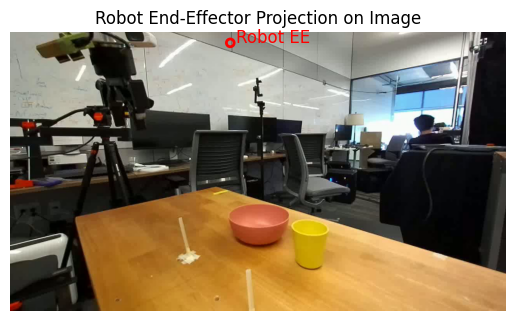

In [5]:
import matplotlib.pyplot as plt

# 图像路径
image_path = "droid_raw/1.0.1/AUTOLab/success/2023-07-07/Fri_Jul__7_09:42:23_2023/recordings/MP4/24400334/frame_00001.png"

# 像素坐标
u, v = (567.96, 27.57)

# 读取图像
image = plt.imread(image_path)

# 创建绘图
fig, ax = plt.subplots()
ax.imshow(image)

# 在指定位置画一个红色圆圈（半径为10）
circle = plt.Circle((u, v), radius=10, color='red', fill=False, linewidth=2)
ax.add_patch(circle)

# 添加文字说明
ax.text(u + 15, v, 'Robot EE', color='red', fontsize=12)

# 设置标题
ax.set_title("Robot End-Effector Projection on Image")

# 显示图像
plt.axis('off')  # 不显示坐标轴
plt.show()

### pose 绘制

In [9]:
# 从 world_T_robot 中提取平移和旋转
position = cartesian_pose_matrix[:3, 3]         # 世界坐标系下的位置
rotation = cartesian_pose_matrix[:3, :3]        # 3x3 旋转矩阵

length = 0.1  # 轴线长度（米）

# 本地坐标系下的点（分别沿 x, y, z 方向延伸 length 米）
local_x_axis_point = np.array([length, 0, 0])
local_y_axis_point = np.array([0, length, 0])
local_z_axis_point = np.array([0, 0, length])

# 计算这些点在世界坐标系中的位置
world_x = position + rotation @ local_x_axis_point
world_y = position + rotation @ local_y_axis_point
world_z = position + rotation @ local_z_axis_point

def project_to_image(point_world, camera_T_world, K):
    """
    point_world: 世界坐标 (3,)
    camera_T_world: 世界到相机的变换矩阵 (4,4)
    K: 内参矩阵 (3,3)
    返回像素坐标 (u, v)
    """
    # 齐次坐标转换
    point_world_homogeneous = np.append(point_world, 1)
    point_camera_homogeneous = camera_T_world @ point_world_homogeneous
    point_camera = point_camera_homogeneous[:3]

    if point_camera[2] <= 0:
        return None  # 点在相机后方，无法投影

    # 投影到图像平面
    u = K[0, 0] * point_camera[0] / point_camera[2] + K[0, 2]
    v = K[1, 1] * point_camera[1] / point_camera[2] + K[1, 2]

    return (u, v)

fx, fy = 531.7265014648438, 531.7265014648438
cx, cy = 636.1519775390625, 344.0089416503906

K = np.array([
    [fx, 0,  cx],
    [0,  fy, cy],
    [0,  0,  1 ]
])


# 获取相机到世界的变换
camera_T_world = np.linalg.inv(camera_extrinsic_matrix)

# 原点（末端中心）
origin_pixel = project_to_image(position, camera_T_world, K)

# 各轴末端点
x_pixel = project_to_image(world_x, camera_T_world, K)
y_pixel = project_to_image(world_y, camera_T_world, K)
z_pixel = project_to_image(world_z, camera_T_world, K)

print("Origin (u0, v0):", origin_pixel)
print("X-axis end (ux, vx):", x_pixel)
print("Y-axis end (uy, vy):", y_pixel)
print("Z-axis end (uz, vz):", z_pixel)



Origin (u0, v0): (np.float64(567.9619731984155), np.float64(27.5685208218174))
X-axis end (ux, vx): (np.float64(637.1001543911327), np.float64(104.99440655471324))
Y-axis end (uy, vy): (np.float64(608.201321469706), np.float64(23.428033933054564))
Z-axis end (uz, vz): (np.float64(503.71965223043185), np.float64(113.65886361701459))


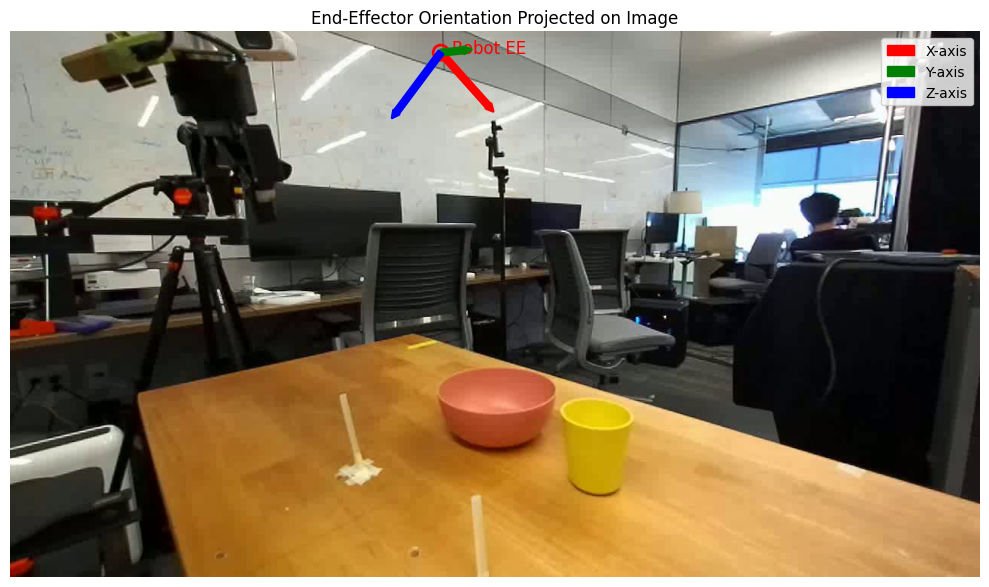

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# === 输入参数 ===
image_path = "droid_raw/1.0.1/AUTOLab/success/2023-07-07/Fri_Jul__7_09:42:23_2023/recordings/MP4/24400334/frame_00001.png"

# 像素坐标（由之前算法得到）
# origin_pixel = (712.34, 368.12)
# x_pixel = (752.34, 370.12)
# y_pixel = (714.34, 408.12)
# z_pixel = (708.34, 328.12)

# === 加载图像 ===
image = plt.imread(image_path)

# === 创建绘图 ===
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image)


# 在指定位置画一个红色圆圈（半径为10）
circle = plt.Circle((u, v), radius=10, color='red', fill=False, linewidth=2)
ax.add_patch(circle)

# 添加文字说明
ax.text(u + 15, v, 'Robot EE', color='red', fontsize=12)

# 设置标题
ax.set_title("Robot End-Effector Projection on Image")



# === 绘制坐标轴箭头 ===
# x-axis - Red
ax.annotate('', xy=x_pixel, xytext=origin_pixel,
            arrowprops=dict(facecolor='red', edgecolor='red', lw=2, headwidth=5, headlength=5))

# y-axis - Green
ax.annotate('', xy=y_pixel, xytext=origin_pixel,
            arrowprops=dict(facecolor='green', edgecolor='green', lw=2, headwidth=5, headlength=5))

# z-axis - Blue
ax.annotate('', xy=z_pixel, xytext=origin_pixel,
            arrowprops=dict(facecolor='blue', edgecolor='blue', lw=2, headwidth=5, headlength=5))





# === 添加图例说明 ===
legend_elements = [
    mpatches.Patch(color='red', label='X-axis'),
    mpatches.Patch(color='green', label='Y-axis'),
    mpatches.Patch(color='blue', label='Z-axis')
]
ax.legend(handles=legend_elements, loc='upper right')

# === 设置标题和关闭坐标轴 ===
ax.set_title("End-Effector Orientation Projected on Image")
plt.axis('off')

# === 显示图像 ===
plt.tight_layout()
plt.show()

# 检查外参是否有不同

In [21]:
import json
import h5py
import os
import numpy as np
from tqdm import tqdm

# JSON文件路径
json_file = "droid_raw/cam2base_extrinsics.json"

# 基础路径前缀：将 relative_path 拼接到这里
base_dir = "droid_raw/1.0.1"

# 打开JSON文件
with open(json_file, 'r') as f:
    data = json.load(f)

# 遍历JSON中的每一个条目
for key, entry in tqdm(data.items()):
    # print(f"处理条目: {key}")
    cam_id = sorted(entry.keys())[0]
    # print(entry)
    # print("条目内容:", entry['24400334'])
    rel_path = entry.get("relative_path")
    
    if not rel_path:
        print(f"跳过 {key}: 缺少 relative_path")
        continue

    # 构建完整的.h5文件路径
    traj_path = os.path.join(base_dir, rel_path, "trajectory.h5")

    if not os.path.exists(traj_path):
        print(f"警告: 文件不存在 -> {traj_path}")
        continue

    # 打开hdf5文件并读取 cartesian_position
    try:
        with h5py.File(traj_path, 'r') as h5file:
            # observation/camera_extrinsics/24400334_left
            cartesian_pos = h5file['observation'][f'camera_extrinsics/{cam_id}_left'][()]
            # print(f"\n--- {rel_path} ---")
            # print("cartesian_position shape:", cartesian_pos.shape)
            # print("示例数据（前1个）:")
            # print(cartesian_pos[0])
    except Exception as e:
        print(f"读取失败 {traj_path}: {e}")

    vector_1 = entry[cam_id]
    vector_2 = cartesian_pos[0]

    # 计算差异
    difference = vector_1 - vector_2
    # print(f"Difference for {key}: {difference}")
    if np.linalg.norm(difference) > 1e-6:
        print(f"Warning: Significant difference for {key} - norm: {np.linalg.norm(difference)}")
    else:
        # print(f"Success: No significant difference for {key}")
        pass

print("All entries processed. No significant differences found.")
    # break

  6%|▌         | 2076/36084 [00:10<08:10, 69.38it/s]  

警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-11-30/Thu_Nov_30_13:45:48_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-11-30/Thu_Nov_30_13:47:02_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-11-30/Thu_Nov_30_13:47:57_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-11-30/Thu_Nov_30_13:49:27_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-11-30/Thu_Nov_30_13:50:34_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-11-30/Thu_Nov_30_13:51:40_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-11-30/Thu_Nov_30_13:52:58_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-11-30/Thu_Nov_30_13:54:19_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-11-30/Thu_Nov_30_13:55:53_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-11-30/Thu_Nov_30_13:59:02_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-

  9%|▉         | 3234/36084 [00:29<00:22, 1482.63it/s]

警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-02/Sat_Dec__2_13:09:52_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-02/Sat_Dec__2_13:18:35_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-02/Sat_Dec__2_13:18:57_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-02/Sat_Dec__2_13:19:40_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-02/Sat_Dec__2_13:20:06_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-02/Sat_Dec__2_13:20:24_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-02/Sat_Dec__2_13:20:41_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-02/Sat_Dec__2_13:21:02_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-02/Sat_Dec__2_13:21:38_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-02/Sat_Dec__2_13:22:07_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-

 13%|█▎        | 4684/36084 [01:15<10:44, 48.74it/s]  

警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-09/Sat_Dec__9_16:13:50_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-09/Sat_Dec__9_16:15:21_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-09/Sat_Dec__9_16:16:11_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-09/Sat_Dec__9_16:19:24_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-09/Sat_Dec__9_16:22:10_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-09/Sat_Dec__9_16:24:45_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-09/Sat_Dec__9_16:28:52_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-09/Sat_Dec__9_16:30:00_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-09/Sat_Dec__9_16:32:36_2023/trajectory.h5


 14%|█▍        | 4967/36084 [01:20<01:05, 471.49it/s]

警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-13/Thu_Dec_14_00:00:23_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-13/Thu_Dec_14_00:01:09_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-13/Thu_Dec_14_00:02:08_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-13/Thu_Dec_14_00:03:28_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-13/Thu_Dec_14_00:04:17_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-13/Thu_Dec_14_00:04:52_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-13/Thu_Dec_14_00:05:32_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-13/Thu_Dec_14_00:06:14_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-13/Thu_Dec_14_00:06:56_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-13/Thu_Dec_14_00:08:01_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-

 16%|█▌        | 5719/36084 [01:44<04:06, 123.05it/s]

警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-14/Thu_Dec_14_00:13:06_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-14/Thu_Dec_14_00:59:27_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-14/Thu_Dec_14_01:00:07_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-14/Thu_Dec_14_01:00:30_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-14/Thu_Dec_14_01:01:54_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-14/Thu_Dec_14_01:03:21_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-14/Thu_Dec_14_01:05:59_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-14/Thu_Dec_14_01:10:41_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-14/Thu_Dec_14_01:11:24_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-14/Thu_Dec_14_01:13:10_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-

100%|██████████| 36084/36084 [01:45<00:00, 342.43it/s]  

警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-15/Fri_Dec_15_00:00:54_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-15/Fri_Dec_15_08:52:06_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-15/Fri_Dec_15_08:53:49_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-15/Fri_Dec_15_08:54:21_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-15/Fri_Dec_15_08:54:45_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-15/Fri_Dec_15_08:57:07_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-15/Fri_Dec_15_08:57:38_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-15/Fri_Dec_15_08:57:56_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-15/Fri_Dec_15_09:09:48_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-12-15/Fri_Dec_15_09:29:31_2023/trajectory.h5
警告: 文件不存在 -> droid_raw/1.0.1/AUTOLab/success/2023-

In [18]:
sorted(entry.keys())[0]

'24400334'

# 从数据集到视频全流程

In [70]:
import h5py
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from tqdm import tqdm
import pyzed.sl as sl
import os
import time
# from scipy.spatial.transform import Rotation



def get_intrinsic_parameters(svo_filepath):
    # 创建 ZED 相机对象
    zed = sl.Camera()

    # 设置初始化参数
    init_params = sl.InitParameters()
    init_params.set_from_svo_file(svo_filepath)
    init_params.svo_real_time_mode = False  # 不实时播放

    # 打开相机
    err = zed.open(init_params)
    if err != sl.ERROR_CODE.SUCCESS:
        # print("打开 SVO 文件失败: ", err)
        return

    # 获取相机信息
    camera_info = zed.get_camera_information()
    
    # print("\n=== 左摄像头内参 ===")
    left_cam_params = camera_info.camera_configuration.calibration_parameters.left_cam
    # # print(f"分辨率: {left_cam_params.image_size}")
    # resolution = left_cam_params.image_size
    # print(f"分辨率: {resolution.width} x {resolution.height}")
    # print(f"焦距 (fx, fy): {left_cam_params.fx}, {left_cam_params.fy}")
    # print(f"光心 (cx, cy): {left_cam_params.cx}, {left_cam_params.cy}")
    # # print(f"畸变系数: {list(left_cam_params.distortion_parameters)}")

    # print("\n=== 右摄像头内参 ===")
    right_cam_params = camera_info.camera_configuration.calibration_parameters.right_cam
    # # print(f"分辨率: {right_cam_params.image_size}")
    # resolution = left_cam_params.image_size
    # print(f"分辨率: {resolution.width} x {resolution.height}")
    # print(f"焦距 (fx, fy): {right_cam_params.fx}, {right_cam_params.fy}")
    # print(f"光心 (cx, cy): {right_cam_params.cx}, {right_cam_params.cy}")

    zed.close()
    return left_cam_params, right_cam_params

def to_homogeneous_transform(pose_6d):
    """
    将一个 [x, y, z, rx, ry, rz] 格式的 6-DoF 位姿转换为 4x4 齐次变换矩阵
    假设旋转是轴角格式（Axis-angle）
    """
    translation = pose_6d[:3]
    rot_vector = pose_6d[3:]

    # 使用轴角构造旋转对象
    # rotation = R.from_rotvec(rot_vector)

    rotation = R.from_euler("xyz", np.array(rot_vector))#.as_matrix()

    # 构造 4x4 变换矩阵
    transform = np.eye(4)
    transform[:3, :3] = rotation.as_matrix()
    transform[:3, 3] = translation

    return transform

def project_to_image(point_world, camera_T_world, K):
    """
    point_world: 世界坐标 (3,)
    camera_T_world: 世界到相机的变换矩阵 (4,4)
    K: 内参矩阵 (3,3)
    返回像素坐标 (u, v)
    """
    # 齐次坐标转换
    point_world_homogeneous = np.append(point_world, 1)
    point_camera_homogeneous = camera_T_world @ point_world_homogeneous
    point_camera = point_camera_homogeneous[:3]

    if point_camera[2] <= 0:
        return None  # 点在相机后方，无法投影

    # 投影到图像平面
    u = K[0, 0] * point_camera[0] / point_camera[2] + K[0, 2]
    v = K[1, 1] * point_camera[1] / point_camera[2] + K[1, 2]

    return (u, v)


date = "2023-11-21" #"2023-11-24" #"2023-11-13" #"2023-09-05"#"2023-08-12"#"2023-10-27" #"2023-08-12" #"2023-11-30"
timestemp = "Tue_Nov_21_11:23:03_2023" #"Tue_Nov_21_08:51:58_2023" #"Sat_Nov_25_10:06:22_2023" #"Fri_Nov_17_20:30:02_2023" #"Fri_Nov_24_18:42:53_2023" #"Mon_Nov_13_15:55:29_2023" #"Tue_Sep__5_08:50:21_2023" #"Fri_Jul__7_14:58:30_2023" #"Sat_Aug_12_12:15:52_2023"#"Fri_Oct_27_19:49:00_2023" # #"Thu_Nov_30_07:37:44_2023" #"Fri_Jul__7_09:44:34_2023" #"Fri_Jul__7_09:55:14_2023" #"Fri_Jul__7_09:44:34_2023" #"Fri_Jul__7_09:43:39_2023" #"Fri_Jul__7_09:42:23_2023"
camera = "22008760"#"24400334" #"22008760"#"24400334" #"22008760" #"24400334"
left_or_right = "left"
file_path = f'droid_raw/1.0.1/AUTOLab/success/{date}/{timestemp}/trajectory.h5'

# 把视频拆分成帧
video_path = f'droid_raw/1.0.1/AUTOLab/success/{date}/{timestemp}/recordings/MP4/{camera}.mp4'
frame_save_path = f'droid_raw/1.0.1/AUTOLab/success/{date}/{timestemp}/recordings/MP4/{camera}_{left_or_right}/'

print(f"视频路径: {video_path}")
print(f"帧保存路径: {frame_save_path}")

if not os.path.exists(video_path):
    print(f"视频文件 {video_path} 不存在，请检查路径。")
if not os.path.exists(frame_save_path):
    os.makedirs(frame_save_path)
# else:
    # os.system(f"ffmpeg -i {video_path} -vf fps=30 {frame_save_path}/frame_%05d.png")
# 使用默认fps
os.system(f"ffmpeg -i {video_path} {frame_save_path}/frame_%05d.png")
    

time.sleep(10)  # 等待文件系统更新

plt.close('all')

with h5py.File(file_path, 'r') as f:
    # 获取 action/cartesian_position 数据
    cartesian_pos = f['action/cartesian_position'][()]
    camera_extrinsic = f[f'observation/camera_extrinsics/{camera}_{left_or_right}'][()]

svo_filepath = f"droid_raw/1.0.1/AUTOLab/success/{date}/{timestemp}/recordings/SVO/{camera}.svo"

left_cam_params, right_cam_params = get_intrinsic_parameters(svo_filepath)
if left_or_right == "left":
    cam_params = left_cam_params
else:
    cam_params = right_cam_params

fx, fy = cam_params.fx, cam_params.fy
cx, cy = cam_params.cx, cam_params.cy
    
for i in tqdm(range(cartesian_pos.shape[0] - 1)):
    # 示例：对第一个时间步进行转换
    cartesian_pose_matrix = to_homogeneous_transform(cartesian_pos[i])
    camera_extrinsic_matrix = to_homogeneous_transform(camera_extrinsic[i])

    # print("Cartesian Pose (4x4):\n", cartesian_pose_matrix)
    # print("\nCamera Extrinsic (4x4):\n", camera_extrinsic_matrix)

    # Step 1: 获取末端位置（平移部分）
    robot_position_world = cartesian_pose_matrix[:3, 3]  # 取自你提供的 world_T_robot 的最后一列前三行

    # Step 2: 将其从世界坐标系变换到相机坐标系
    world_T_camera = camera_extrinsic_matrix  # 即你提供的 camera_T_world 的 inverse
    camera_T_world = np.linalg.inv(world_T_camera)

    # 构造齐次坐标点 [x, y, z, 1]
    point_world_homogeneous = np.append(robot_position_world, 1)
    point_camera_homogeneous = camera_T_world @ point_world_homogeneous
    point_camera = point_camera_homogeneous[:3]

    # 如果深度为负（在相机背后），则不在视野中
    if point_camera[2] < 0:
        print("该点在相机后方，无法投影。")
    else:
        # Step 3: 使用相机内参进行投影
        # fx, fy = 531.7265014648438, 531.7265014648438
        # cx, cy = 636.1519775390625, 344.0089416503906

        u = fx * point_camera[0] / point_camera[2] + cx
        v = fy * point_camera[1] / point_camera[2] + cy

        # # Step 4: 检查是否在图像范围内
        # if 0 <= u < 1280 and 0 <= v < 720:
        #     print(f"末端中心在图像上的像素坐标为: ({u:.2f}, {v:.2f})")
        # else:
        #     print(f"末端中心在图像外: ({u:.2f}, {v:.2f})")


    # 从 world_T_robot 中提取平移和旋转
    position = cartesian_pose_matrix[:3, 3]         # 世界坐标系下的位置
    rotation = cartesian_pose_matrix[:3, :3]        # 3x3 旋转矩阵

    length = 0.1  # 轴线长度（米）

    # 本地坐标系下的点（分别沿 x, y, z 方向延伸 length 米）
    local_x_axis_point = np.array([length, 0, 0])
    local_y_axis_point = np.array([0, length, 0])
    local_z_axis_point = np.array([0, 0, length])

    # 计算这些点在世界坐标系中的位置
    world_x = position + rotation @ local_x_axis_point
    world_y = position + rotation @ local_y_axis_point
    world_z = position + rotation @ local_z_axis_point


    # fx, fy = 531.7265014648438, 531.7265014648438
    # cx, cy = 636.1519775390625, 344.0089416503906

    K = np.array([
        [fx, 0,  cx],
        [0,  fy, cy],
        [0,  0,  1 ]
    ])


    # 获取相机到世界的变换
    camera_T_world = np.linalg.inv(camera_extrinsic_matrix)

    # 原点（末端中心）
    origin_pixel = project_to_image(position, camera_T_world, K)

    # 各轴末端点
    x_pixel = project_to_image(world_x, camera_T_world, K)
    y_pixel = project_to_image(world_y, camera_T_world, K)
    z_pixel = project_to_image(world_z, camera_T_world, K)

    # print("Origin (u0, v0):", origin_pixel)
    # print("X-axis end (ux, vx):", x_pixel)
    # print("Y-axis end (uy, vy):", y_pixel)
    # print("Z-axis end (uz, vz):", z_pixel)

    # === 输入参数 ===
    image_path = f"{frame_save_path}/frame_{i+1:05d}.png"

    # 像素坐标（由之前算法得到）
    # origin_pixel = (712.34, 368.12)
    # x_pixel = (752.34, 370.12)
    # y_pixel = (714.34, 408.12)
    # z_pixel = (708.34, 328.12)

    # === 加载图像 ===
    image = plt.imread(image_path)

    # === 创建绘图 ===
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(image)


    # 在指定位置画一个红色圆圈（半径为10）
    circle = plt.Circle((u, v), radius=20, color='red', fill=False, linewidth=5)
    ax.add_patch(circle)

    # 添加文字说明
    ax.text(u + 15, v, '  Robot EE', color='red', fontsize=20)

    # # 设置标题
    # ax.set_title(f"output_video-{date}_{timestemp}_{camera}_{left_or_right}")



    # === 绘制坐标轴箭头 ===
    # x-axis - Red
    ax.annotate('', xy=x_pixel, xytext=origin_pixel,
                arrowprops=dict(facecolor='red', edgecolor='red', lw=2, headwidth=5, headlength=5))

    # y-axis - Green
    ax.annotate('', xy=y_pixel, xytext=origin_pixel,
                arrowprops=dict(facecolor='green', edgecolor='green', lw=2, headwidth=5, headlength=5))

    # z-axis - Blue
    ax.annotate('', xy=z_pixel, xytext=origin_pixel,
                arrowprops=dict(facecolor='blue', edgecolor='blue', lw=2, headwidth=5, headlength=5))


    # === 添加图例说明 ===
    legend_elements = [
        mpatches.Patch(color='red', label='X-axis'),
        mpatches.Patch(color='green', label='Y-axis'),
        mpatches.Patch(color='blue', label='Z-axis')
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    # === 设置标题和关闭坐标轴 ===
    # ax.set_title("End-Effector Orientation Projected on Image")
    ax.set_title(f"output_video-{date}_{timestemp}_{camera}_{left_or_right}")
    plt.axis('off')


    output_dir = f"droid_raw/1.0.1/AUTOLab/success/{date}/{timestemp}/recordings/MP4/{camera}_{left_or_right}_output"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # === 显示图像 ===
    plt.tight_layout()
    # plt.show()
    
    plt.savefig(f"{output_dir}/output_image_{i+1:05d}.png")
    
    plt.close(fig)

    # plt.show()
    # if i > 3:
    #     break

# 把帧合并成视频
# os.system(
#     f"ffmpeg -framerate 30 -i {output_dir}/output_image_%05d.png  -vf 'fps=30,scale=320:180:flags=lanczos,palettegen' -c:v gif -gifflags +transdiff output_video-{date}_{timestemp}_{camera}_{left_or_right}.gif -y"
#           )
# # ffmpeg -framerate 30 -i {output_dir}/output_image_%05d.png -c:v libx264 -pix_fmt yuv420p output_video.mp4
# 设置参数
input_fps = 30
output_fps = 10
scale_width = 320   # 输出宽度（高度自动按比例缩放）

# Step 1: 生成调色板（缩放 + 抽帧）
os.system(
    f"ffmpeg -framerate {input_fps} -i {output_dir}/output_image_%05d.png "
    f'-vf "scale={scale_width}:-1:flags=lanczos,fps={output_fps},palettegen" '
    f'palette.png -y'
)

# Step 2: 使用调色板生成 GIF（再次缩放 + 抽帧）
os.system(
    f"ffmpeg -framerate {input_fps} -i {output_dir}/output_image_%05d.png "
    f"-i palette.png "
    f'-lavfi "[0]scale={scale_width}:-1:flags=lanczos,fps={output_fps}[img];[img][1]paletteuse" '
    f'-gifflags +transdiff '
    f"output_video-{date}_{timestemp}_{camera}_{left_or_right}.gif -y"
)

视频路径: droid_raw/1.0.1/AUTOLab/success/2023-11-21/Tue_Nov_21_11:23:03_2023/recordings/MP4/22008760.mp4
帧保存路径: droid_raw/1.0.1/AUTOLab/success/2023-11-21/Tue_Nov_21_11:23:03_2023/recordings/MP4/22008760_left/


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

[2025-07-09 02:17:37 UTC][ZED][INFO] Logging level INFO
[2025-07-09 02:17:37 UTC][ZED][INFO] [Init]  Depth mode: NEURAL
[2025-07-09 02:17:37 UTC][ZED][INFO] [Init]  Serial Number: S/N 22008760


100%|██████████| 270/270 [01:12<00:00,  3.75it/s]
ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-lib

0

In [43]:
output_dir

'droid_raw/1.0.1/AUTOLab/success/2023-07-07/Fri_Jul__7_14:58:30_2023/recordings/MP4/24400334_left_output'

In [ ]:
f"ffmpeg -framerate 30 -i {output_dir}/output_image_%05d.png  -vf 'fps=30,scale=320:180:flags=lanczos,palettegen' -c:v gif -gifflags +transdiff output_video-{date}_{timestemp}_{camera}_{left_or_right}.gif -y"
   

In [59]:
# 设置参数
input_fps = 30
output_fps = 10
scale_width = 320   # 输出宽度（高度自动按比例缩放）

# Step 1: 生成调色板（缩放 + 抽帧）
os.system(
    f"ffmpeg -framerate {input_fps} -i {output_dir}/output_image_%05d.png "
    f'-vf "scale={scale_width}:-1:flags=lanczos,fps={output_fps},palettegen" '
    f'palette.png -y'
)

# Step 2: 使用调色板生成 GIF（再次缩放 + 抽帧）
os.system(
    f"ffmpeg -framerate {input_fps} -i {output_dir}/output_image_%05d.png "
    f"-i palette.png "
    f'-lavfi "[0]scale={scale_width}:-1:flags=lanczos,fps={output_fps}[img];[img][1]paletteuse" '
    f'-gifflags +transdiff '
    f"output_video-{date}_{timestemp}_{camera}_{left_or_right}.gif -y"
)

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

0

In [56]:
# 设置帧率
input_fps = 30
output_fps = 10  # 抽帧目标帧率

# Step 1: 生成调色板（抽帧）
os.system(
    f"ffmpeg -framerate {input_fps} -i {output_dir}/output_image_%05d.png "
    f'-vf "scale=320:-1:flags=lanczos,fps={output_fps},palettegen" '
    f'palette.png -y'
)

# Step 2: 使用调色板生成 GIF（抽帧后）
os.system(
    f"ffmpeg -framerate {input_fps} -i {output_dir}/output_image_%05d.png "
    f"-i palette.png "
    f'-lavfi "[0]scale=320:-1[1]paletteuse,fps={output_fps}" '
    # f'-lavfi "[0]scale=320:-1:flags=lanczos,fps=10 [img];[img][1]paletteuse"'
    f'-gifflags +transdiff '
    f"output_video-{date}_{timestemp}_{camera}_{left_or_right}.gif -y"
)

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

256

In [ ]:
import numpy as np
import cv2
import torch

from scipy.spatial.transform import Rotation
rot = Rotation.from_euler("xyz", np.array(extrinsic_6d[3:])).as_matrix()

# I read the intrinsics from a svo file
# There are some small differences among the 3rd person cameras, but reading the specific intrinsic of specific camera does not improve the result
FOCAL_LEN = 531.72650146
CX = 636.15197754
CY = 344.00894165
RESOLUTION_SCALE_DOWN = 4
additional_row = np.array([0, 0, 0, 1]).reshape(1, 4)

def project(world_traj, rot, trans):
    # Get extrinsics matrix from rotation and translation
    extrinsics = np.concatenate([rot, trans.reshape(3, 1)], axis=1)
    T_world_cam = np.concatenate([extrinsics, additional_row], axis=0)

    # Get 3D traj in camera frame
    ones = np.ones((world_traj.shape[0], 1))
    world_traj = np.concatenate([world_traj, ones], axis=1)
    camera_traj = (T_world_cam @ world_traj.T)[:3]
    x = camera_traj[0]
    y = camera_traj[1]
    z = camera_traj[2]

    # Get pixel traj
    pix_u = x * FOCAL_LEN / z + CX
    pix_v = y * FOCAL_LEN / z + CY
    pixel_traj = np.stack([pix_u, pix_v], axis=1) / RESOLUTION_SCALE_DOWN
    pixel_traj = pixel_traj.astype(np.int32)

    return pixel_traj

if __name__ == "__main__":
    extrinsic_6d, world_traj = ... # read from the dataset
    rot = Rotation.from_euler("xyz", np.array(extrinsic_6d[3:])).as_matrix()
    trans = extrinsic_6d[:3]
    pixel_traj = project(world_traj, rot, trans)
    
    # visualize the 2d trajectories with visualization class of co-tracker (do not use the tracking model)
    video = ... # read from dataset
    vis = Visualizer(save_dir="./track_result", pad_value=0, linewidth=5, tracks_leave_trace=-1)
    pixel_traj = torch.from_numpy(pixel_traj).view(1, -1, 1, 2)
    vis.visualize(video, pixel_traj)

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

0

In [15]:
z_pixel

In [16]:
y_pixel

(np.float64(1103.7863985726112), np.float64(8978.27879410268))

## 外参


## Pose

# trajectory_im128.h5 目录

In [24]:
import h5py

def print_attrs(name, obj):
    """打印每个对象的路径、类型、形状和属性"""
    print(f"{name}: {type(obj)}")
    if isinstance(obj, h5py.Dataset):  # 如果是数据集，输出形状
        print(f"  Shape: {obj.shape}, Dtype: {obj.dtype}")

file_path = 'droid_raw/1.0.1/AUTOLab/success/2023-07-07/Fri_Jul__7_09:42:23_2023/trajectory_im128.h5'

with h5py.File(file_path, 'r') as f:
    # 查看根目录下的键
    print("Root keys:", list(f.keys()))

    # 遍历整个文件结构
    f.visititems(print_attrs)

Root keys: ['action', 'observation']
action: <class 'h5py._hl.group.Group'>
action/abs_pos: <class 'h5py._hl.dataset.Dataset'>
  Shape: (417, 3), Dtype: float64
action/abs_rot_6d: <class 'h5py._hl.dataset.Dataset'>
  Shape: (417, 6), Dtype: float64
action/abs_rot_euler: <class 'h5py._hl.dataset.Dataset'>
  Shape: (417, 3), Dtype: float64
action/cartesian_position: <class 'h5py._hl.dataset.Dataset'>
  Shape: (417, 6), Dtype: float64
action/cartesian_velocity: <class 'h5py._hl.dataset.Dataset'>
  Shape: (417, 6), Dtype: float64
action/gripper_position: <class 'h5py._hl.dataset.Dataset'>
  Shape: (417, 1), Dtype: float64
action/gripper_velocity: <class 'h5py._hl.dataset.Dataset'>
  Shape: (417, 1), Dtype: float64
action/joint_position: <class 'h5py._hl.dataset.Dataset'>
  Shape: (417, 7), Dtype: float64
action/joint_velocity: <class 'h5py._hl.dataset.Dataset'>
  Shape: (417, 7), Dtype: float64
action/rel_pos: <class 'h5py._hl.dataset.Dataset'>
  Shape: (417, 3), Dtype: float64
action/rel_

打印外参

In [15]:
import h5py

file_path = 'droid_raw/1.0.1/AUTOLab/success/2023-07-07/Fri_Jul__7_09:42:23_2023/trajectory_im128.h5'

with h5py.File(file_path, 'r') as f:
    # 读取 action/cartesian_position 数据集
    cartesian_position = f['observation/camera/extrinsics'][()]
    
    print("cartesian_position 的形状:", cartesian_position.shape)
    print("前5行数据：")
    # print(cartesian_position[:5])

TypeError: Accessing a group is done with bytes or str, not <class 'tuple'>

In [ ]:
如果相机参数是

分辨率: 1280 x 720
焦距 (fx, fy): 531.7265014648438, 531.7265014648438
光心 (cx, cy): 636.1519775390625, 344.0089416503906



请帮我编写一个函数把输入的pose转换为相机坐标系下的点云。

In [40]:
import h5py

file_path = 'droid_raw/1.0.1/AUTOLab/success/2023-07-07/Fri_Jul__7_09:42:23_2023/trajectory_im128.h5'

with h5py.File(file_path, 'r') as f:
    # 读取 action/cartesian_position 数据集
    cartesian_position = f['observation/camera/intrinsics']#[()]
    
    print("cartesian_position 的形状:", cartesian_position)
    print("前5行数据：")
    # print(cartesian_position[:5])

cartesian_position 的形状: <HDF5 group "/observation/camera/intrinsics" (0 members)>
前5行数据：


Root keys: ['action', 'observation']
action: <class 'h5py._hl.group.Group'>
action/cartesian_position: <class 'h5py._hl.dataset.Dataset'>
  Shape: (472, 6), Dtype: float64
action/cartesian_velocity: <class 'h5py._hl.dataset.Dataset'>
  Shape: (472, 6), Dtype: float64
action/gripper_position: <class 'h5py._hl.dataset.Dataset'>
  Shape: (472,), Dtype: float64
action/gripper_velocity: <class 'h5py._hl.dataset.Dataset'>
  Shape: (472,), Dtype: float64
action/joint_position: <class 'h5py._hl.dataset.Dataset'>
  Shape: (472, 7), Dtype: float64
action/joint_velocity: <class 'h5py._hl.dataset.Dataset'>
  Shape: (472, 7), Dtype: float64
action/robot_state: <class 'h5py._hl.group.Group'>
action/robot_state/cartesian_position: <class 'h5py._hl.dataset.Dataset'>
  Shape: (472, 6), Dtype: float64
action/robot_state/gripper_position: <class 'h5py._hl.dataset.Dataset'>
  Shape: (472,), Dtype: float64
action/robot_state/joint_positions: <class 'h5py._hl.dataset.Dataset'>
  Shape: (472, 7), Dtype: floa

In [20]:
import h5py

file_path = 'droid_raw/1.0.1/AUTOLab/success/2023-07-07/Fri_Jul__7_09:42:23_2023/trajectory.h5'

with h5py.File(file_path, 'r') as f:
    # 读取 action/cartesian_position 数据集
    cartesian_position = f['action/cartesian_position'][()]
    
    print("cartesian_position 的形状:", cartesian_position.shape)
    print("前5行数据：")
    print(cartesian_position[:5])

cartesian_position 的形状: (472, 6)
前5行数据：
[[ 0.32939342  0.19034225  0.42199621 -3.03452271 -0.22346778  0.28078961]
 [ 0.32948589  0.19047005  0.42276251 -3.03430688 -0.22523503  0.28086751]
 [ 0.32946375  0.19047709  0.42316201 -3.03423216 -0.2262405   0.28086026]
 [ 0.32946754  0.19048288  0.42318809 -3.03422028 -0.22630291  0.28085884]
 [ 0.32946837  0.19048251  0.42320153 -3.03422185 -0.22633707  0.28086771]]


In [23]:
cartesian_position 

array([[ 0.32939342,  0.19034225,  0.42199621, -3.03452271, -0.22346778,
         0.28078961],
       [ 0.32948589,  0.19047005,  0.42276251, -3.03430688, -0.22523503,
         0.28086751],
       [ 0.32946375,  0.19047709,  0.42316201, -3.03423216, -0.2262405 ,
         0.28086026],
       ...,
       [ 0.47971624,  0.02414755,  0.28302386, -3.08788932, -0.15810829,
        -0.09486777],
       [ 0.47971645,  0.02417534,  0.28301886, -3.08788638, -0.15810123,
        -0.09481472],
       [ 0.47971809,  0.02415736,  0.28302333, -3.08788582, -0.15811335,
        -0.09485363]], shape=(472, 6))

In [22]:
cartesian_position 

array([[ 0.32939342,  0.19034225,  0.42199621, -3.03452271, -0.22346778,
         0.28078961],
       [ 0.32948589,  0.19047005,  0.42276251, -3.03430688, -0.22523503,
         0.28086751],
       [ 0.32946375,  0.19047709,  0.42316201, -3.03423216, -0.2262405 ,
         0.28086026],
       ...,
       [ 0.47971624,  0.02414755,  0.28302386, -3.08788932, -0.15810829,
        -0.09486777],
       [ 0.47971645,  0.02417534,  0.28301886, -3.08788638, -0.15810123,
        -0.09481472],
       [ 0.47971809,  0.02415736,  0.28302333, -3.08788582, -0.15811335,
        -0.09485363]], shape=(472, 6))

In [14]:
import h5py

# 打开一个h5文件，'r'表示只读模式
file_path = 'droid_raw/1.0.1/AUTOLab/success/2023-07-07/Fri_Jul__7_09:42:23_2023/trajectory.h5'
with h5py.File(file_path, 'r') as f:
    
    
    print(f"正在读取文件：{file_path}, 类型：{type(f)}")
    # 查看文件中的所有数据集和组
    
    
    print("文件中的键（数据集/组）：", list(f.keys()))


    for key in f.keys():
        print(f"键：{key}, 类型：{type(f[key])}, 形状：{f[key].shape if hasattr(f[key], 'shape') else 'N/A'}")

        print(f"数据集 '{key}' 的数据为：{f[key]}")
        # print(f"数据集 '{key}' 的类型为：{f[key].dtype if hasattr(f[key], 'dtype') else 'N/A'}")

    # # 假设你知道其中一个数据集名称是 'dataset_name'
    # dataset_name = 'my_dataset'

    # if dataset_name in f:
    #     # 读取数据集
    #     data = f[dataset_name][()]  # [()] 表示读取全部数据到内存中
    #     print(f"数据集 '{dataset_name}' 的形状为：{data.shape}")cd
    #     print(f"数据集 '{dataset_name}' 的类型为：{data.dtype}")
    #     print(f"前5行数据为：\n{data[:5]}")
    # else:
    #     print(f"数据集 '{dataset_name}' 不存在于该文件中。")

正在读取文件：droid_raw/1.0.1/AUTOLab/success/2023-07-07/Fri_Jul__7_09:42:23_2023/trajectory.h5, 类型：<class 'h5py._hl.files.File'>
文件中的键（数据集/组）： ['action', 'observation']
键：action, 类型：<class 'h5py._hl.group.Group'>, 形状：N/A
数据集 'action' 的数据为：<HDF5 group "/action" (9 members)>
键：observation, 类型：<class 'h5py._hl.group.Group'>, 形状：N/A
数据集 'observation' 的数据为：<HDF5 group "/observation" (5 members)>


In [4]:
import pandas as pd

# # 写入
# df = pd.DataFrame({'a': range(5), 'b': range(5, 10)})
# df.to_hdf('droid_raw/1.0.1/AUTOLab/success/2023-07-07/Fri_Jul__7_09:42:23_2023/trajectory.h5', key='df_key', mode='w')

# 读取
df_loaded = pd.read_hdf('droid_raw/1.0.1/AUTOLab/success/2023-07-07/Fri_Jul__7_09:42:23_2023/trajectory.h5', key='df_key')
print(df_loaded)

ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.

In [5]:
!pip install pytables

ERROR: Could not find a version that satisfies the requirement pytables (from versions: none)
ERROR: No matching distribution found for pytables


In [6]:
!conda install -c conda-forge pytables

Retrieving notices: done
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful attempt using repodata from current_repodata.json, retrying with next repodata source.
Solving environment: | ^C

CondaError: KeyboardInterrupt

